**Advanced programming and Master Data Science**

BATCH NO: DW09

TASK: 06

Assignment No:04

NAME: T Prashant

**Boston Housing Dataset**

Predicting Median value of owner-occupied homes


**Dataset**

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive Data, and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

# Import Essential Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Variables There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 dollars.

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in 1000's dollars

In [2]:
# Loading Boston Housing Dataset (train dataset)

train=pd.read_csv("https://raw.githubusercontent.com/Prashantkumar8141/GUVI_Task_6_All_Assignment/main/Dataset/train.csv")

In [3]:
train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [4]:
# Loading Boston Housing Dataset(test dataset)

test=pd.read_csv("https://raw.githubusercontent.com/Prashantkumar8141/GUVI_Task_6_All_Assignment/main/Dataset/test.csv")
test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


**Exploratory Data Analysis**

Let’s do some exploratory data analysis to familiarize ourselves with the dataset.

In [5]:
print(train.shape)
print(test.shape)

(400, 15)
(105, 14)


In [6]:
train.isna().sum() 

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

there is no null values in train dataset

In [7]:
test.isna().sum().sum()

0

there is no null values in test dataset

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       105 non-null    int64  
 1   CRIM     105 non-null    float64
 2   ZN       105 non-null    float64
 3   INDUS    105 non-null    float64
 4   CHAS     105 non-null    int64  
 5   NOX      105 non-null    float64
 6   RM       105 non-null    float64
 7   AGE      105 non-null    float64
 8   DIS      105 non-null    float64
 9   RAD      105 non-null    int64  
 10  TAX      105 non-null    float64
 11  PTRATIO  105 non-null    float64
 12  B        105 non-null    float64
 13  LSTAT    105 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.6 KB


In [10]:
X_train=train.drop(columns=["MEDV"])
y_train=train["MEDV"]

**Fitting the Model**

**LINEAR RIGRESSION**

In [11]:
model=LinearRegression().fit(X_train,y_train)


In [12]:
X_test=test
y_test=model.predict(X_test)
y_test




array([23.73506751, 24.95136924, 15.88089233, 19.85091304, 22.29894619,
       22.42955832, 18.86395835, 22.34880649, 33.83109891, 18.58232007,
       25.38479576, 21.98122643, 20.50078548, 18.27941977, 20.18913804,
       26.90070179, 17.40443619, 24.58484808, 19.21356829, 21.59260395,
       25.6610499 , 36.76216517, 23.47561198,  9.51140278, 14.20438316,
        8.47393205, 16.96940841, 20.1537498 , 23.71000393, 15.39774067,
       36.98297908, 18.97610996, 18.46291719, 18.7269356 , 26.60846492,
       20.07752855, 30.58651764, 30.62557668, 39.03524085, 25.18896754,
       19.17117357, 31.30804217, 24.65609018, 17.69647704, 21.44779569,
       26.33851758, 20.15961741, 24.20108164, 14.8033231 , 13.77042767,
       19.67799386, 34.17113246, 24.6440971 , -4.16058119, 12.79857026,
       16.49704692, 20.37051594, 12.6910992 , 10.62372749, 18.40942178,
       19.97547493, 20.49047064, 32.64299936, 24.30410633, 35.85871855,
       32.68261617, 15.6697776 , 21.6467729 , 25.32293412, 16.61

In [13]:
print(model.score(X_test,y_test))

1.0


In [15]:
output={"id":test["ID"],"Output":y_test}
Output_data=pd.DataFrame(output)

In [16]:
Output_data.to_csv("output.csv")

**Gradient Descent**

In [17]:
X=Output_data["id"]
y=Output_data["Output"]

In [18]:
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost
#calculating derivative of each point
#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w

In [19]:
w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(X)):
        a=single_point_cost(X[i],y[i],w)
        cost+=a
    
    cost1=cost/len(X)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(X)):
        b=grad(X[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(X)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time

optimal value w is  0.11287143767763233


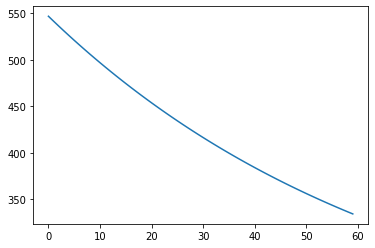

In [20]:
print("optimal value w is ",w) #optimal value of w
epochs=np.arange(60)
plt.plot(epochs,all_costs)

optimal value w is  0.29646867267766625


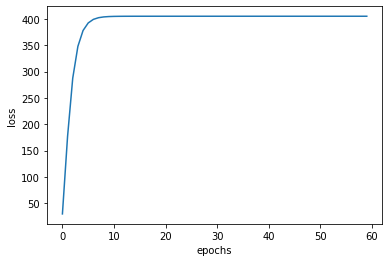

In [21]:
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(X)):
        cost21=single_point_cost(X[i],y[i],w)
        grad_w21=grad(X[i],y[i],w)
        w= w- (gamma * grad_w21) # in sgd update takes place after every point
    all_costs23.append(cost21)

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs23)

optimal value w is  0.22030569406983838


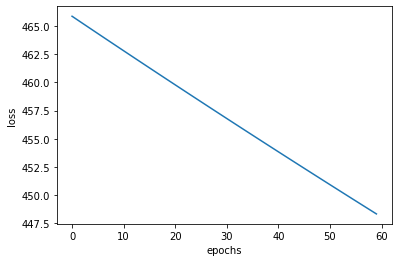

In [22]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.000001
batch_size= 5
all_costs41=[]
for k in range(60):
    for j in range(int(len(X)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(X[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs41.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(X[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs41)

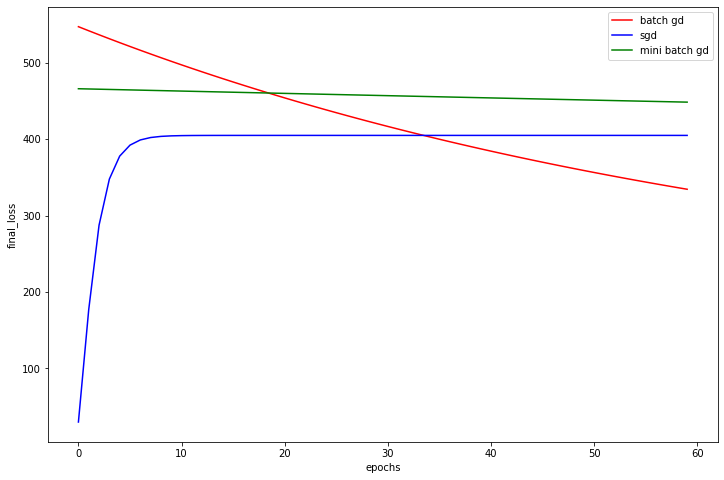

In [23]:
plt.figure(figsize=(12,8))
plt.plot(epochs,all_costs,c='r',label="batch gd")
plt.plot(epochs,all_costs23,c='b',label="sgd")
plt.plot(epochs,all_costs41,c='g',label="mini batch gd")
plt.xlabel("epochs")
plt.ylabel("final_loss")
plt.legend()
plt.show()